# Simple Stock Backtesting

https://www.investopedia.com/terms/b/backtesting.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'MSFT'
start = '2016-01-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,54.320000,54.799999,53.389999,54.799999,51.065639,53778000
2016-01-05,54.930000,55.389999,54.540001,55.049999,51.298611,34079700
2016-01-06,54.320000,54.400002,53.639999,54.049999,50.366753,39518900
2016-01-07,52.700001,53.490002,52.070000,52.169998,48.614864,56564900
2016-01-08,52.369999,53.279999,52.150002,52.330002,48.763962,48754000


In [3]:
# Create Signal and Moving Average for long and short
# Initialize signals column to zero
df['Signal'] = 0
df['Short_MA'] = df['Adj Close'].rolling(window=20).mean()
df['Long_MA'] = df['Adj Close'].rolling(window=50).mean()

In [4]:
# Create short and long signal with short window
short_window=40
df['Signal'][short_window:] = np.where(df['Short_MA'][short_window:] > df['Long_MA'][short_window:], 1, 0)

In [5]:
# Compute the difference between consecutive entries in signals 
df['Positions'] = df['Signal'].diff()

In [6]:
# Create Positions 
positions = pd.DataFrame(index=df.index).fillna(0.0)        
positions = 100 * df['Signal']

In [7]:
# Daily and Total of Profit & Loss
df['Daily P&L'] = df['Adj Close'].diff() * df['Signal']
df['Total P&L'] = df['Daily P&L'].cumsum()

In [8]:
df

,Open,High,Low,Close,Adj Close,Volume,Signal,Short_MA,Long_MA,Positions,Daily P&L,Total P&L
Date,,,,,,,,,,,,
2016-01-04,54.320000,54.799999,53.389999,54.799999,51.065639,53778000,0,NaN,NaN,NaN,NaN,NaN
2016-01-05,54.930000,55.389999,54.540001,55.049999,51.298611,34079700,0,NaN,NaN,0.0,0.000000,0.000000
2016-01-06,54.320000,54.400002,53.639999,54.049999,50.366753,39518900,0,NaN,NaN,0.0,-0.000000,0.000000
2016-01-07,52.700001,53.490002,52.070000,52.169998,48.614864,56564900,0,NaN,NaN,0.0,-0.000000,0.000000
2016-01-08,52.369999,53.279999,52.150002,52.330002,48.763962,48754000,0,NaN,NaN,0.0,0.000000,0.000000
2016-01-11,52.509998,52.849998,51.459999,52.299999,48.736000,36663600,0,NaN,NaN,0.0,-0.000000,0.000000
2016-01-12,52.759998,53.099998,52.060001,52.779999,49.183296,36095500,0,NaN,NaN,0.0,0.000000,0.000000
2016-01-13,53.799999,54.070000,51.299999,51.639999,48.120983,66883600,0,NaN,NaN,0.0,-0.000000,0.000000
2016-01-14,52.000000,53.419998,51.570000,53.110001,49.490814,52381900,0,NaN,NaN,0.0,0.000000,0.000000


In [9]:
# Create Portfolio dataframe with Holding, Cash, Total, Returns
initial_capital = 10000 # Starting Cash
positions = pd.DataFrame(index=df.index).fillna(0.0)
positions = 100 * df['Positions']
portfolio = pd.DataFrame(index=df.index)
portfolio['Holdings'] = positions*df['Adj Close']       
portfolio['Cash'] = initial_capital - portfolio['Holdings'].cumsum()
portfolio['Total'] = portfolio['Cash'] + positions.cumsum() * df['Adj Close']
portfolio['Returns'] = portfolio['Total'].pct_change

## Plot Chart Signals

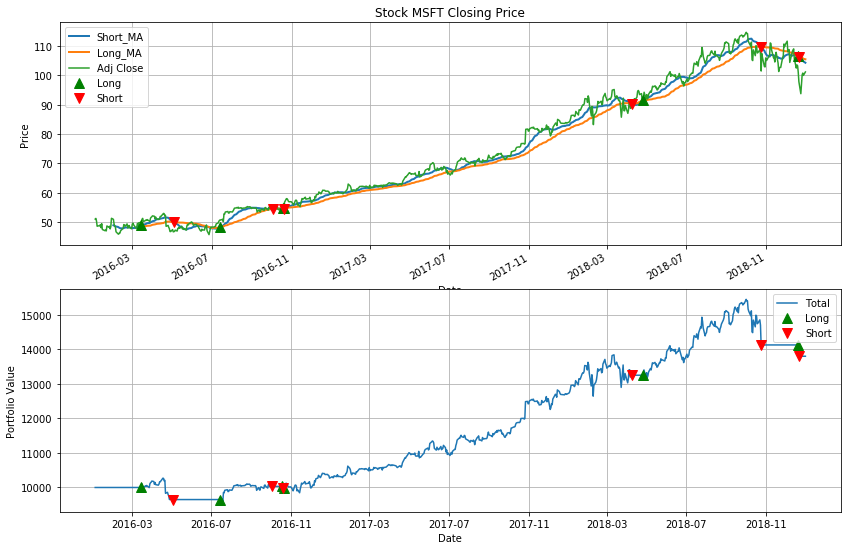

In [10]:
# Plot backtesting for Long and Short
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
df[['Short_MA', 'Long_MA']].plot(ax=ax1, lw=2.)
ax1.plot(df['Adj Close'])
ax1.plot(df.ix[df['Positions'] == 1.0].index, df.Short_MA[df['Positions'] == 1.0],'^', markersize=10, color='g', label='Long')
ax1.plot(df.ix[df['Positions'] == -1.0].index,  df.Short_MA[df['Positions'] == -1.0],'v', markersize=10, color='r', label='Short')
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.grid()
ax1.legend()

# Plot backtesting Portfolio Values
ax2 = plt.subplot(2, 1, 2)
ax2.plot(portfolio['Total'])
ax2.plot(portfolio['Returns'].ix[df['Positions'] == 1.0].index, portfolio['Total'][df['Positions']  == 1.0],'^', markersize=10, color='g', label='Long')
ax2.plot(portfolio['Returns'].ix[df['Positions'] == -1.0].index, portfolio['Total'][df['Positions'] == -1.0],'v', markersize=10, color='r', label='Short')
ax2.set_ylabel('Portfolio Value')
ax2.set_xlabel('Date')
ax2.legend()
ax2.grid()